# <center>Winning Jeopardy</center>
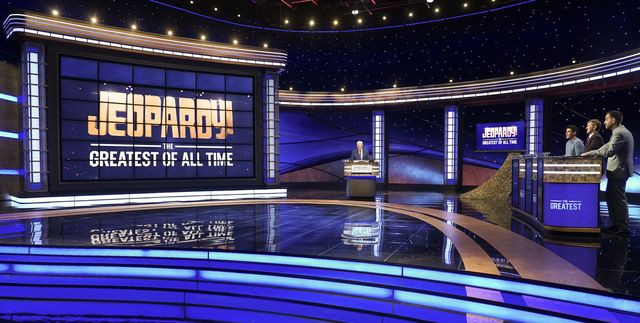

Jeopardy is a popular TV show in the US where participants answer questions to win money. It's been running for many years, and is a major force in popular culture. Imagine that you want to compete on Jeopardy, and you're looking for any way to win. 

In this project, we'll work with a dataset of Jeopardy questions to figure out some patterns in the questions that could help you win.

The dataset is named jeopardy.csv, and contains 20000 rows from the beginning of a full dataset of Jeopardy questions, which you can download [here](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/).

Each row in the dataset represents a single question on a single episode of Jeopardy. Here are explanations of each column:

- <mark>Show Number</mark> - the Jeopardy episode number
- <mark>Air Date</mark> - the date the episode aired
- <mark>Round</mark> - the round of Jeopardy
- <mark>Category</mark> - the category of the question
- <mark>Value</mark> - the number of dollars the correct answer is worth
- <mark>Question</mark> - the text of the question
- <mark>Answer</mark> - the text of the answer

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import random 
from scipy.stats import chisquare

import warnings
warnings.filterwarnings('ignore')

# Reading in the Dataset

In [2]:
# Reading in the spam message data.
jeopardy_data = pd.read_csv('./Data/jeopardy.csv')

# Looking at the first ten rows of data
jeopardy_data.head(10)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,2004-12-31,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


## Data Cleaning

Before we can start doing analysis on the Jeopardy questions, we need to standardise all of the text columns (the <mark>Question</mark> and <mark>Answer</mark> columns). 

Firstly, some of the column labels have whitespace infront of them that we want to remove:

In [3]:
# Getting a list of the column labels

columns_original = list(jeopardy_data.columns)

# Setting up an empty list for the corrected column labels
columns_corrected = []

# Iterating over the column labels
for i, obs in enumerate(columns_original):
    # Assigning column label to a variable
    col_name = columns_original[i]
    # Stripping the leading whitespace
    col_new_name = col_name.lstrip(' ')
    # Appending the corrected label to the list of corrected labels
    columns_corrected.append(col_new_name)
    
# Applying the new corrected labels to the dataset
jeopardy_data.columns = columns_corrected

### Standardising Text in Questions and Answers

Next we need to ensure that we put words in lowercase and remove punctuation so <mark>Don't</mark> and <mark>don't</mark> aren't considered to be different words when you compare them.

We are going to write a function to standardise questions and answers. The function will:
- Take in a string.
- Convert the string to lowercase.
- Remove all punctuation in the string.
- Return the string.

In [4]:
# Writing a function to standardise strings

def standardise_text(string):
    # Making the text lower case (lc)
    string_lc = string.lower()
    
    # Removing all punctuation (np)
    string_lc_np = re.sub(r'[^\w\s]', '', string_lc)
    
    # Removing any double whitespaces (dws)
    string_lc_np_dws = re.sub("\s+", " ", string_lc_np)
    
    # Returning the standardised text
    return string_lc_np_dws

# Running a test case to see that the code is working
standardise_text('If I write this!!!!! sentence!s reALLy horrific@ally,         MY code Shou£ld co{{{rre}}c}t iT')

'if i write this sentences really horrifically my code should correct it'

In [5]:
# Applying the text standardisation to the Questions and Answers, putting the results into new columns.
jeopardy_data['clean_question'] = jeopardy_data['Question'].apply(standardise_text)
jeopardy_data['clean_answer'] = jeopardy_data['Answer'].apply(standardise_text)

jeopardy_data.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams


### Standardising Numbers

We need the <mark>Value</mark> column to be numeric, to allow us to manipulate it easier. We'll need to remove the dollar sign from the beginning of each value and convert the column from text to numeric.

We are going to write a function to standardise dollar values. The function will:
- Take in a string.
- Remove any punctuation in the string.
- Convert the string to an integer.
- Assign 0 instead if the conversion has an error.
- Return the integer.

In [6]:
# Writing a function to standardise numbers

# Function takes in a number as a string
def standardise_numbers(number_str):
    # Removing all punctuation (np)
    number_str_np = re.sub(r'[^\w\s]', '', number_str)
    
    # Removing any double whitespaces (dws)
    number_str_np_dws = re.sub("\s+", " ", number_str_np)
    
    # Now we use a try and except statement to return 0 if the string is not a number.
    try:
        number = int(number_str_np_dws)
    except:
        number = int(0)
        
    return number
        
print('Standardising \'$400\' with our function returns: ' + str(standardise_numbers('$400')))
print('Standardising \'Pony\' with our function returns: ' + str(standardise_numbers('Pony')))

Standardising '$400' with our function returns: 400
Standardising 'Pony' with our function returns: 0


In [7]:
# Applying the number standardisation to the Value column, putting the results into a new column.
jeopardy_data['clean_value'] = jeopardy_data['Value'].apply(standardise_numbers)

jeopardy_data.head(100)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200
...,...,...,...,...,...,...,...,...,...,...
95,5957,2010-07-06,Double Jeopardy!,SEE & SAY,$800,"Say <a href=""http://www.j-archive.com/media/20...",Oregon,say a hrefhttpwwwjarchivecommedia20100706_dj_2...,oregon,800
96,5957,2010-07-06,Double Jeopardy!,NEWS TO ME,$800,This car company has been in the news for wide...,Toyota,this car company has been in the news for wide...,toyota,800
97,5957,2010-07-06,Double Jeopardy!,IN THE DICTIONARY,$800,"As an adjective, it can mean proper; as a verb...",correct,as an adjective it can mean proper as a verb t...,correct,800
98,5957,2010-07-06,Double Jeopardy!,SCIENCE CLASS,$1200,The wedge is an adaptation of the simple machi...,plane,the wedge is an adaptation of the simple machi...,plane,1200


### Converting Dates to DateTime

The <mark>Air Date</mark> column should also be a datetime, not a string, to enable us to work with it easier.

In [8]:
# Using the Pandas to_datetime function to convert Air Date to datetime format

jeopardy_data['Air Date'] = pd.to_datetime(jeopardy_data['Air Date'])

In order to figure out whether to study past questions, study general knowledge, or not study it all, it would be helpful to figure out two things:

- How often the answer can be used for a question.
- How often questions are repeated.

We can answer the second question by seeing how often complex words (> 6 characters) reoccur. We can answer the first question by seeing how many times words in the answer also occur in the question. We'll work on the first question and come back to the second.



In [9]:
# Write a function that takes in a row in jeopardy and figures out how many words in the answer are also in the question

# Taking a random row of the jeopardy dataset that happens to have the word 'the' in it, for testing purposes.
series = jeopardy_data.iloc[99]

# Defining our function
def jeopardy_a_in_q(q_series):
    
    # Splitting the cleaned questions and answers into lists
    split_answer = q_series['clean_answer'].split()
    split_question = q_series['clean_question'].split()

    # Starting a match count
    match_count = 0
    
    # Removing the word 'the' from split answer
    if "the" in split_answer:
        split_answer.remove("the")
        
    # Return 0 if there are no words in the split_answer
    if len(split_answer) == 0:
        return 0

    # Looping through the answer to see which words occur in the question
    for word in split_answer:
        if word in split_question:
            match_count += 1
            
    # Returning a ratio of repeated words to the length of the answer
    return match_count / len(split_answer)
            

In [10]:
# Applying our function to the dataset
jeopardy_data['question_in_answer'] = jeopardy_data.apply(jeopardy_a_in_q, axis=1)

# Calculating the mean of the column
jeopardy_data['question_in_answer'].mean()

0.059001965249777744

### Observation

We can see that words from the answer are in the questions approximately 6% of the time. This is not a significant amount of the time and so it makes little sense to rely on the answers to make informed guesses of the questions. Instead it would be better to study the types of questions that are likely to be asked, based on historical trends and the recycling of previous questions.

### Investigating Common Terms

Let's say we want to investigate how often new questions are repeats of older ones. We can't completely answer this, because we only have about 10% of the full Jeopardy question dataset, but we can investigate it at least.

To do this, we will:

- Sort jeopardy in order of ascending air date.
- Maintain a set called <mark>terms_used</mark> that will be empty initially.
- Iterate through each row of jeopardy.
- Split clean_question into words, remove any word shorter than 6 characters, and check if each word occurs in <mark>terms_used</mark>.
    - If it does, increment a counter.
    - Add each word to terms_used.

This allows us to check if the terms in questions have been used previously or not. Only looking at words with six or more characters enables us to filter out words like the and than, which are commonly used, but don't tell us a lot about a question.

In [11]:
# Creating a list for question overlap
question_overlap = []

# Creating a set to count common terms
terms_used = set()

# Sorting the dataframe by date
jeopardy_data.sort_values(by='Air Date', inplace=True)

# Using itterow to loop through the rows of the Jeopardy dataframe

for i, row in jeopardy_data.iterrows():

    # Splitting the question into a list of words, by splitting on spaces
    split_question = row['clean_question'].split(" ")
    
    # Removing any words from the list that are less than 6 letters long
    split_question = [l for l in split_question if len(l) >= 6]
    
    # Setting a counter to count the number of words in the question that has been used before
    match_count = 0
    
    # Cycling through the words in the question
    for word in split_question:
        
        # Increasing counter if word has been used in set of terms prior.
        if word in terms_used:
            match_count += 1
            
        # Adding the word to the set of terms (reminder that words can only appear once in a set)
        terms_used.add(word)
        
    # If the question has words in it, proceed to calculate question overlap
    if len(split_question) > 0:
        # Divide the total number of repeated words by total length of question - this is our question overlap with previous
        # questions
        match_count = match_count/len(split_question)
        
    # Appending the match count (which is now converted to question_overlap) to the list of question overlaps 
    question_overlap.append(match_count)
    
# Creating a column for question overlap in the full dataframe
jeopardy_data['question_overlap'] = question_overlap
    
print('On average, there is a ' + str(round(jeopardy_data['question_overlap'].mean()*100,1)) + '% overlap in question terms.')

On average, there is a 68.9% overlap in question terms.


### Observations

This shows us that there is a 68.9% overlap in the terms used in older and newer questions. We have to keep in mind that we are only looking at 10% of the full question dataset and that this overlap is only an overlap in single terms, not phrases. However, given that the recycling of terms is high, it warrants investigating the reuse of questions more thoroughly.

## Investigating High Value Questions



Let's say we only want to study questions that pertain to high value questions instead of low value questions. This will help us earn more money when we're on Jeopardy.

We can actually figure out which terms correspond to high-value questions using a chi-squared test. We'll first need to narrow down the questions into two categories:

- Low value -- Any row where <mark>Value</mark> is less than <mark>800</mark>.
- High value -- Any row where <mark>Value</mark> is greater than <mark>800</mark>.

We'll then be able to loop through each of the terms from the <mark>terms_used</mark>, and:

- Find the number of low value questions the word occurs in.
- Find the number of high value questions the word occurs in.
- Find the percentage of questions the word occurs in.
- Based on the percentage of questions the word occurs in, find expected counts.
- Compute the chi squared value based on the expected counts and the observed counts for high and low value questions.

You can then find the words with the biggest differences in usage between high and low value questions, by selecting the words with the highest associated chi-squared values. Doing this for all of the words would take a very long time, so we'll just do it for a small sample now.

In [12]:
# Creating a function that takes a row from the dataframe and determines if it is a high or low value question.

# Setting a dataframe row for testing
test_row = jeopardy_data.iloc[19995]

# Defining the funtion to test whether high value or not
def question_value(input_row):
    
    # Setting question value
    value_int = int(input_row['clean_value'])
    
    # Using if statements to set 0 for low value and 1 for high value
    if value_int > 800:
        value = 1
    elif value_int <= 800:
        value = 0
        
    # Returning the value    
    return value
    
# Applying this function to our dataset and assigning the results to a column "High Value"
jeopardy_data['High Value'] = jeopardy_data.apply(question_value, axis=1)

In [13]:
# We are now going to create a funtion that will take in each word of the terms_used set and count how often it occurrs
# in the low and high value questions, respectively.

input_word = 'space'

def count_word(test_word):
    low_count = 0 
    high_count = 0
    
    for i, row in jeopardy_data.iterrows():
        
        # Splitting the question 
        split_question = row['clean_question'].split(" ")
        
        if test_word in split_question:
            if row['High Value'] == 0:
                low_count += 1
            else:
                high_count += 1
    return low_count, high_count
            
count_word(input_word)

(40, 23)

In [14]:
# Randomly pick ten elements of terms_used and append them to a list called comparison_terms.

comparison_terms = random.sample(terms_used,10)
print(comparison_terms)

# Create an empty list called observed_expected.
observed_expected = []


# Loop through each term in comparison_terms, and:
# Run the function on the term to get the high value and low value counts.
# Append the result of running the function (which will be a list) to observed_expected.

for term in comparison_terms:
    
    observed_expected.append(count_word(term))

['creamy', 'homage', 'reprimanded', 'strongly', 'hobandesigned', 'detroit', 'assures', 'broadcasts', 'holeia', 'holder']


In [15]:
print(comparison_terms)
print(observed_expected)

['creamy', 'homage', 'reprimanded', 'strongly', 'hobandesigned', 'detroit', 'assures', 'broadcasts', 'holeia', 'holder']
[(0, 1), (3, 1), (2, 0), (1, 1), (1, 0), (11, 3), (0, 1), (2, 0), (0, 1), (4, 0)]


Now that we've found the observed counts for a few terms, we can compute the expected counts and the chi-squared value.

In [18]:
# Find the number of rows in jeopardy where high_value is 1, and assign to high_value_count.
high_value_count = len(jeopardy_data[jeopardy_data['High Value']==1])

# Find the number of rows in jeopardy where high_value is 0, and assign to low_value_count.
low_value_count = len(jeopardy_data[jeopardy_data['High Value']==0])

# Create an empty list called chi_squared
chi_squared = []

# Loop through each list in observed_expected.

for obs in observed_expected:
    # Add up both items in the list (high and low counts) to get the total count, and assign to total.
    low = obs[0]
    high = obs[1]
    total = low + high
    
    # Divide total by the number of rows in jeopardy to get the proportion across the dataset. Assign to total_prop.
    total_prop = total / (len(jeopardy_data))
    
    # Multiply total_prop by high_value_count to get the expected term count for high value rows.
    exp_high_value = total_prop * high_value_count
    # Multiply total_prop by low_value_count to get the expected term count for low value rows.
    exp_low_value = total_prop * low_value_count
    
    expected = np.array([exp_low_value,exp_high_value])
    observed = np.array([low,high])

    chi_p = chisquare(observed,expected)
    
    chi_squared.append(chi_p)

In [20]:
chi_squared

[Power_divergenceResult(statistic=2.487792117195675, pvalue=0.11473257634454047),
 Power_divergenceResult(statistic=0.02636443308440769, pvalue=0.871013484688921),
 Power_divergenceResult(statistic=0.803925692253768, pvalue=0.3699222378079571),
 Power_divergenceResult(statistic=0.4448774816612795, pvalue=0.5047776487545996),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469),
 Power_divergenceResult(statistic=0.3591166740081454, pvalue=0.5489972218273612),
 Power_divergenceResult(statistic=2.487792117195675, pvalue=0.11473257634454047),
 Power_divergenceResult(statistic=0.803925692253768, pvalue=0.3699222378079571),
 Power_divergenceResult(statistic=2.487792117195675, pvalue=0.11473257634454047),
 Power_divergenceResult(statistic=1.607851384507536, pvalue=0.2047940943922556)]

## Observations

From our results above, we can see that we have low chi-square values, probably due to the low number of observed samples used. In fact, the manual page for the scipy.stats.mstats.chisquare function states that we need at least five samples for the chi-square test to be valid. We can see that we often do not have 5 samples in our observed counts of high and low value.

Additionally, the P-value shows no significant relationship between the use for terms for high and low value questions, so we cease this line of investigation.